In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from FeedForwardNeuralNetwork import NeuralNetwork, LossFxn

In [2]:
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data.to_numpy(), mnist.target.to_numpy().astype(int)

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_small = X_train[:5000]
y_train_small = y_train[:5000]
X_test_small = X_test[:1000]
y_test_small = y_test[:1000]

print(f"Training set: {X_train_small.shape}")
print(f"Test set: {X_test_small.shape}")

Loading MNIST dataset...
Training set: (5000, 784)
Test set: (1000, 784)


In [3]:
def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((len(y), num_classes))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_train_encoded = one_hot_encode(y_train_small)
y_test_encoded = one_hot_encode(y_test_small)

print(f"Label shape: {y_train_encoded.shape}")
print(f"Sample label: {y_train_small[0]} -> {y_train_encoded[0]}")

Label shape: (5000, 10)
Sample label: 5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


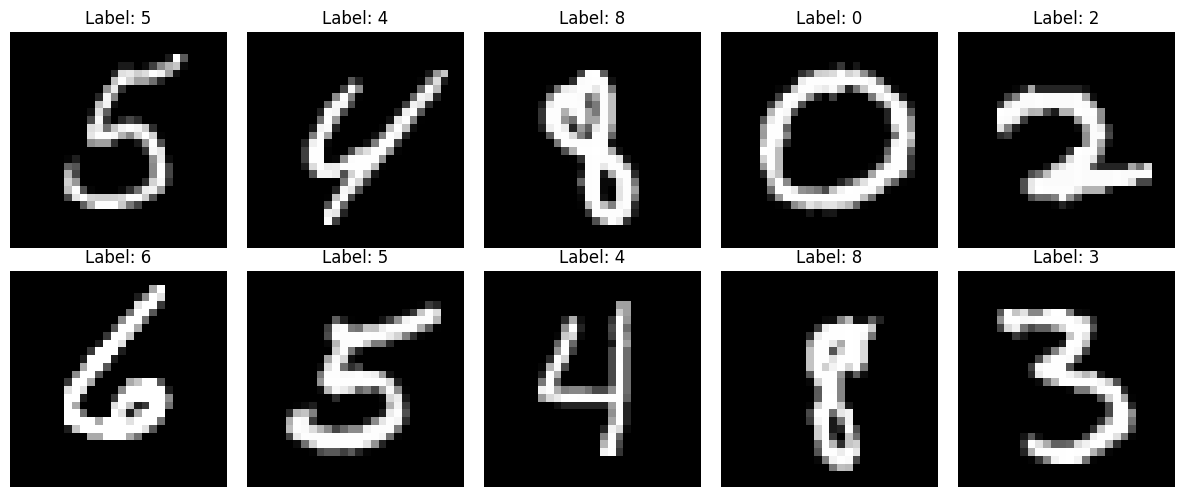

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_small[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y_train_small[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [5]:
nn = NeuralNetwork(
    layerSizes=[784, 128, 64, 10],
    activations=['tanh', 'tanh', 'softmax'],
    LossFunction='CrossEntropy'
)

print("Neural Network created:")

Neural Network created:


In [7]:
print("Training neural network...")
nn.train(x=X_train_small, y=y_train_encoded,epochs=10)
print("Training complete!")

Training neural network...
Epoch 0: Loss = 0.008675
Epoch 1: Loss = 0.007154
Epoch 2: Loss = 0.005987
Epoch 3: Loss = 0.005138
Epoch 4: Loss = 0.004494
Epoch 5: Loss = 0.003988
Epoch 6: Loss = 0.003580
Epoch 7: Loss = 0.003244
Epoch 8: Loss = 0.002963
Epoch 9: Loss = 0.002724
Training complete!


In [8]:
def predict(nn, X):
    predictions = []
    for i in range(len(X)):
        output = nn.forward(X[i].reshape(-1, 1))
        pred_class = np.argmax(output)
        predictions.append(pred_class)
    return np.array(predictions)

y_pred = predict(nn, X_test_small)
accuracy = np.mean(y_pred == y_test_small)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 94.10%


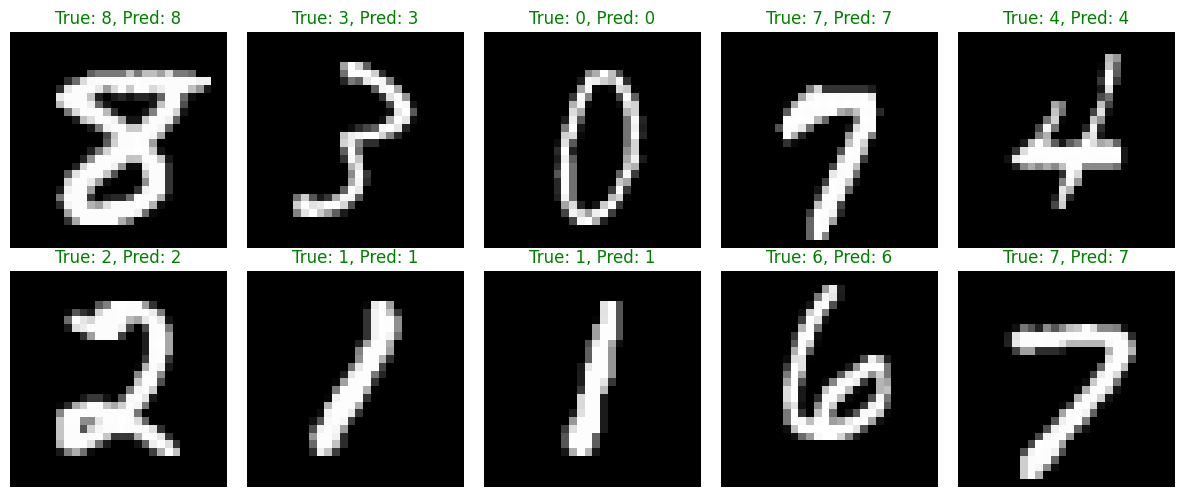

In [9]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    idx = i * 10
    ax.imshow(X_test_small[idx].reshape(28, 28), cmap='gray')
    true_label = y_test_small[idx]
    pred_label = y_pred[idx]
    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f'True: {true_label}, Pred: {pred_label}', color=color)
    ax.axis('off')
plt.tight_layout()
plt.show()